In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [28]:
df = pd.read_csv('kyphosis.csv')

In [29]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [30]:
# first we need to standarize our data
# for this we import the following function from our sklearn library

from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(df.drop('Kyphosis', axis = 1))

C:\Users\umair\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
# now we need to scaled our remaining features..

scaled_feat = scaler.transform(df.drop('Kyphosis', axis = 1))

C:\Users\umair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
featured_df = pd.DataFrame(scaled_feat, columns = df.columns[1:])

In [39]:
#scaled_feat

In [40]:
featured_df.head()

,Age,Number,Start
0,-0.219143,-0.652035,-1.337907
1,1.287494,-0.652035,0.516341
2,0.767964,-0.030684,-1.337907
3,-1.414063,0.590667,-2.162017
4,-1.431381,-0.030684,0.722368


In [41]:
# now we want to split train and test sets, out of our featured_df

from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(featured_df, df['Kyphosis'],
                                                   test_size = 0.3)

In [45]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [59]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(25, 3) (25,)
(56, 3) (56,)


In [60]:
# now we need to import our K_NEAREST_NEIGHBORS model from sklearn

from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [68]:
pred = knn.predict(X_test)

In [69]:
# now we need to evaluate our model..

from sklearn.metrics import confusion_matrix, classification_report

In [72]:
print('Confusion matrix:')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print('classification report: '), print('\n')
print(classification_report(y_test,pred))



Confusion matrix:


[[17  2]
 [ 4  2]]


classification report: 


              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

   micro avg       0.76      0.76      0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [75]:
# now we have to find the exact value of 'k' for which our prediction gives
# maximized probability using elbow method

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    


In [77]:
error_rate

[0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24]

Text(0, 0.5, 'Error rate')

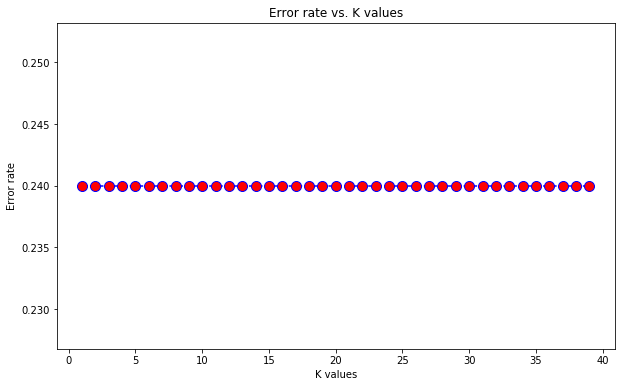

In [82]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', markersize = 10, linestyle = 'dashed',
        marker = 'o', markerfacecolor = 'red')

plt.title('Error rate vs. K values')
plt.xlabel('K values')
plt.ylabel('Error rate')

In [83]:
#conclusion:
#since the error rate is same for all the values of 'K'
# therefore, we have the same prediction value for all values of --> 'K' :)
